# Model evaluation

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
%matplotlib notebook

In [4]:
dataset = load_digits()
X,y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [7]:
#creating a dataset with imbalances binary classes
# negetive class (0) is 'not digit 1'
# Positive class (1) is 'digit 1'

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('original labels: \t', y[1:30])
print('New binary labels :\t', y_binary_imbalanced[1:30])

original labels: 	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels :	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state =0)


# accuracy of support dvector mahine classifier
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', C =1).fit(X_train, y_train)
svm.score(X_test,y_test)


0.9955555555555555

# Dummy Classifiers


Dummy Classifier is a classifier that makes predictions using simple rules , which can be useful as a baseline for comparision against actual classifiers, especiall with imbalanced classes.

In [12]:
from sklearn.dummy import DummyClassifier

#Negetive class(0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

# therefore the dummy 'most_frequent'  classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [14]:
svm = SVC(kernel ='linear', C =1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

# confusion matrices

# binary (two- class) confution matrix

In [16]:
from sklearn.metrics import confusion_matrix

# Negetive class (0) is most frequent
dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('most frequent class (dummy classifier)\n', confusion)

most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [17]:
#produces random predictions w/ same class prortion as training set 
dummy_classprop = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n',confusion)

Random class-proportional prediction (dummy classifier)
 [[364  43]
 [ 42   1]]


In [20]:
svm = SVC(kernel ='linear' ,C= 1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel , C = 1)\n',confusion)

Support vector machine classifier (linear kernel , C = 1)
 [[402   5]
 [  5  38]]


In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusio = confusion_matrix(y_test, lr_predicted)

print('Logistc regression classifier (default setting)\n', confusion)

Logistc regression classifier (default setting)
 [[402   5]
 [  5  38]]


/home/samyak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Deion tree classifier (max_depth = 2) \n', confusion)

Deion tree classifier (max_depth = 2) 
 [[400   7]
 [ 17  26]]


# evaluation matrices for binary classification

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = TP + TN /(TP + TN +FP +FN)
#Precision = TP/(TP + FP)
# recall = TP /(TP  + FN) also known as sensitivity , or True positive rate
# F1 = 2* Precision *Recall/(precision + recall)

print('Accuracy : {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test,tree_predicted)))
print("recall : {:.2f}".format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy : 0.95
Precision: 0.79
recall : 0.60
F1: 0.68


In [30]:
# Combined report with all above metrics 

from sklearn.metrics import classification_report
print (classification_report (y_test, tree_predicted, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [33]:
print('Random class-proportional (dummy)\n',
     classification_report(y_test, y_classprop_predicted, target_names = ['not 1', '1']))

print('SVM \n',
      classification_report(y_test, svm_predicted , target_names = ['not 1', '1']))

print('Logistic regression\n',
     classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))

print('Decison tree\n',
     classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.90      0.89      0.90       407
           1       0.02      0.02      0.02        43

    accuracy                           0.81       450
   macro avg       0.46      0.46      0.46       450
weighted avg       0.81      0.81      0.81       450

SVM 
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg

# Decsion functions 

In [37]:
X_train, X_teat, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list= list(zip(y_test[0:20],y_scores_lr[0:20]))


# show the decision_function scores for first 20 instances
y_score_list

/home/samyak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[(0, -29.828778037531052),
 (0, -19.382846341610872),
 (0, -29.198531219086952),
 (0, -21.74631153837101),
 (0, -22.64237179888091),
 (0, -11.80591162616702),
 (1, 6.496005443745506),
 (0, -23.35463056091561),
 (0, -27.543906461765545),
 (0, -26.888210301594142),
 (0, -31.86303386951868),
 (0, -22.486069505518678),
 (0, -25.318035523442262),
 (0, -13.384507878121415),
 (0, -13.565651716374406),
 (0, -13.308339637198932),
 (1, 12.180976093405564),
 (0, -34.362415844181555),
 (0, -13.231553523583536),
 (0, -29.593994389753064)]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state =0)
y_proba_lr =lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list =list(zip(y_test[0:20],y_proba_lr[0:20,1]))

y_proba_list

/home/samyak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[(0, 1.1105197748929707e-13),
 (0, 3.820645897783359e-09),
 (0, 2.0856383883204196e-13),
 (0, 3.594983463170827e-10),
 (0, 1.4673809292286547e-10),
 (0, 7.460268992193874e-06),
 (1, 0.9984928182495114),
 (0, 7.198016212002211e-11),
 (0, 1.0910217627333311e-12),
 (0, 2.101835087496046e-12),
 (0, 1.452312962948283e-14),
 (0, 1.7156318256867562e-10),
 (0, 1.010454772669772e-11),
 (0, 1.5387973057918651e-06),
 (0, 1.283842530239543e-06),
 (0, 1.6605838546198527e-06),
 (1, 0.9999948729556785),
 (0, 1.1928680705780555e-15),
 (0, 1.7931166324178606e-06),
 (0, 1.4044023226790417e-13)]

# precision - recall curves

<IPython.core.display.Javascript object>


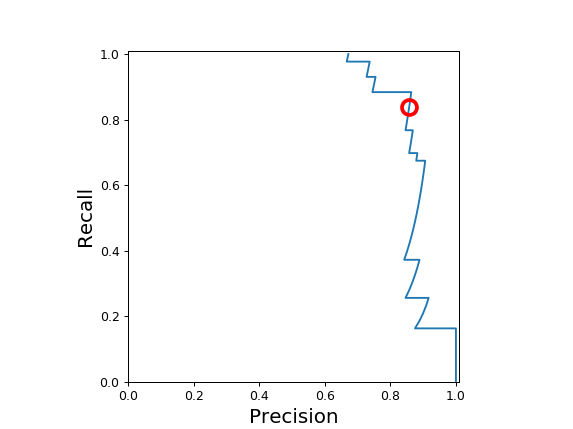

/home/samyak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]


plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0,1.01])
plt.plot(precision, recall, label = 'precision-recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c= 'r', mew = 3)
plt.xlabel('Precision',fontsize = 16)
plt.ylabel('Recall',fontsize = 16)
plt.axes().set_aspect('equal')
plt.show()

# Roc curves , Area under Cureve(AUC)

/home/samyak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<IPython.core.display.Javascript object>


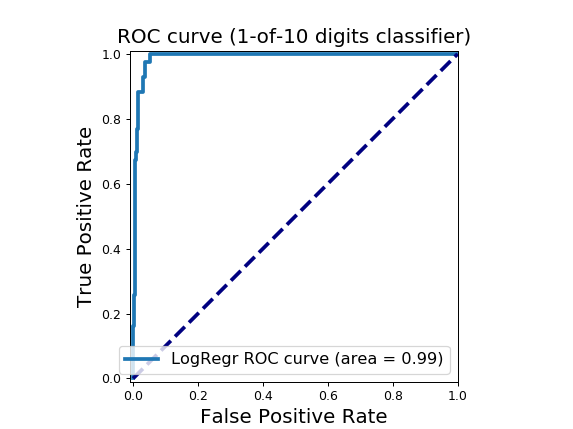

/home/samyak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [49]:
from sklearn.metrics import roc_curve,auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr,_ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)


plt.figure()
plt.xlim([-0.01,1.00])
plt.ylim([-0.01,1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


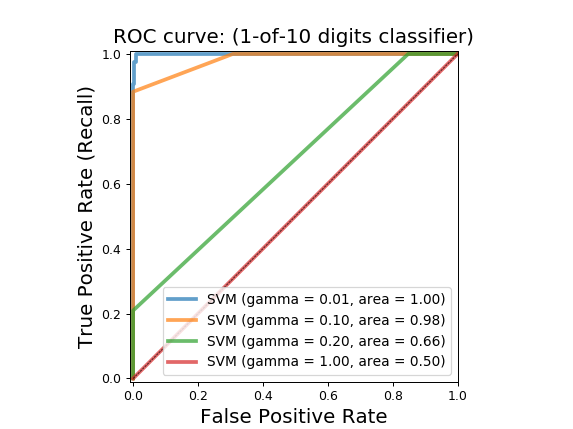

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


/home/samyak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [60]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

# Evaluation measures for multiclass classification

# multi- class confusion matrix

<IPython.core.display.Javascript object>


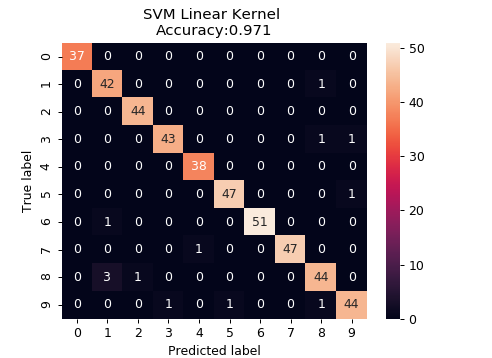

<IPython.core.display.Javascript object>


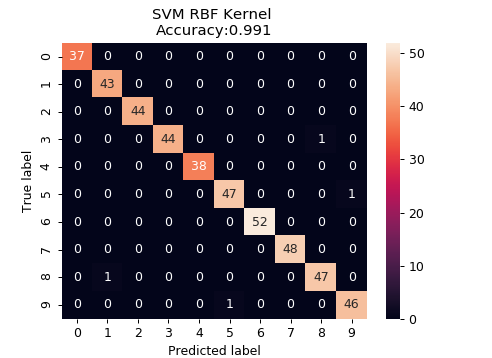

In [67]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [68]:
# multi- class classification report 
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

